
Dataset2:  Cardekho   Dataset


Load Data and Write script to perform following operations.

Task1: Consider the above data and perform preprocessing. 

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the data
data = pd.read_csv('cardekho_dataset.csv')  # Replace with your actual file path

# Step 2: Data Preprocessing

# Handling missing values (if any)
print(data.isnull().sum())  # Check for missing values

# Fill missing values for numeric columns with the mean
numeric_cols = data.select_dtypes(include=[np.number]).columns  # Select numeric columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Fill missing values for categorical columns with the mode (most frequent value)
categorical_cols = data.select_dtypes(include=[object]).columns  # Select categorical columns
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])  # Fill missing with the mode

# Check if any missing values remain
print(data.isnull().sum())

# Handling categorical variables
label_encoder = LabelEncoder()
data['seller_type'] = label_encoder.fit_transform(data['seller_type'])  # Encoding 'seller_type'
data['fuel_type'] = label_encoder.fit_transform(data['fuel_type'])  # Encoding 'fuel_type'
data['transmission_type'] = label_encoder.fit_transform(data['transmission_type'])  # Encoding 'transmission_type'

# Check the data after preprocessing
print(data.head())



No                   0
car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64
No                   0
car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64
   No       car_name    brand     model  vehicle_age  km_driven  seller_type  \
0   0    Maruti Alto   Maruti      Alto            9     120000            1   
1   1  Hyundai Grand  Hyundai     Grand            5      20000            1   
2   2    Hyundai i20  Hyundai       i20           11      60000            1   
3   3    M

Task2: Perform basic EDA for data analysis.

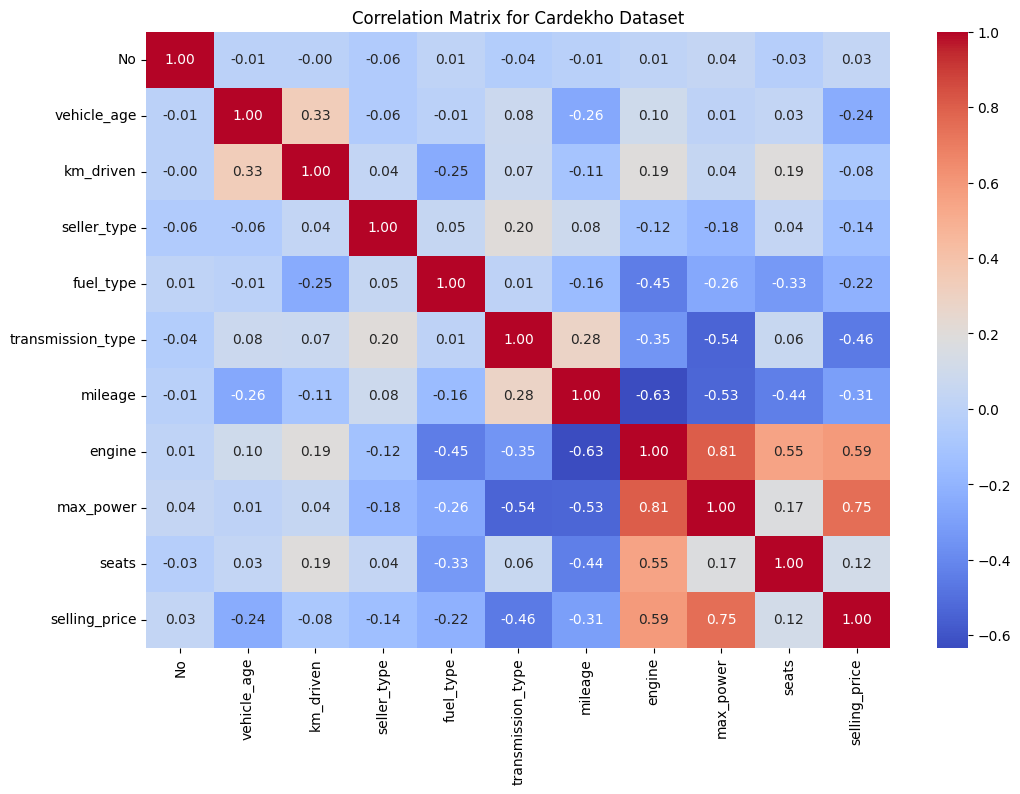

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numeric columns
corr_matrix = numeric_data.corr()

# Step 3: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Cardekho Dataset')
plt.show()




Task 3: Perform feature engineering to select appropriate features.

In [5]:
# Step 3: Selecting features for Multiple Linear Regression
# Select features that are numerically correlated with selling_price
X = data[['vehicle_age', 'km_driven', 'seller_type', 'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power', 'seats']]  # Independent variables
y = data['selling_price']  # Dependent variable

from sklearn.model_selection import train_test_split

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the splits
print(f'Training set size: {X_train.shape}')
print(f'Test set size: {X_test.shape}')


Training set size: (12328, 9)
Test set size: (3083, 9)


Task 4: Construct multiple linear regression model

In [6]:
from sklearn.linear_model import LinearRegression

# Step 5: Create the Multiple Linear Regression model
model = LinearRegression()

# Step 6: Train the model using the training data
model.fit(X_train, y_train)

# Display model coefficients and intercept
print(f'Model Coefficients: {model.coef_}')
print(f'Model Intercept: {model.intercept_}')



Model Coefficients: [-6.05960808e+04 -1.18016177e+00 -4.39343860e+03 -3.92018077e+03
 -1.12642089e+05  1.55061674e+04  1.01397540e+02  1.49263997e+04
  1.21952794e+04]
Model Intercept: -715795.3817660941


Task 5: Evaluate the model with appropriate metrics


Mean Squared Error: 253058551129.38608
R-squared: 0.6638354509519308


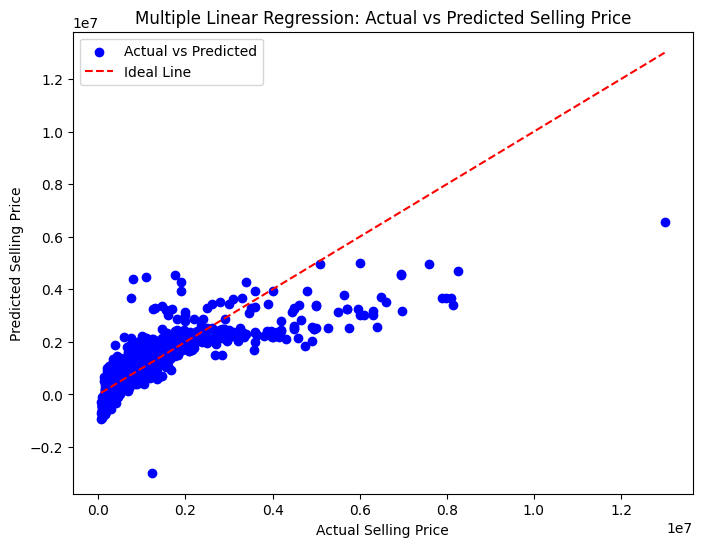

In [7]:
from sklearn.metrics import mean_squared_error, r2_score

# Step 7: Make predictions on the test data
y_pred = model.predict(X_test)

# Step 8: Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Step 9: Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)

rmse = np.sqrt(mse)

# Display the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Step 10: Visualize Actual vs Predicted selling prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Line')

# Customize the plot
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Multiple Linear Regression: Actual vs Predicted Selling Price')
plt.legend()

# Display the plot
plt.show()


Task 6: Generate the results

In [11]:
# Display the results in a clean format
print("\n### Model Evaluation Results ###")
print("\nMultiple Linear Regression Model:")
print(f"- Mean Squared Error (MSE): {mse:.2f}")
print(f"- R-squared (R²): {r2:.2f}")
print(f"- Root Mean Squared Error (RMSE): {rmse:.2f}")



### Model Evaluation Results ###

Multiple Linear Regression Model:
- Mean Squared Error (MSE): 253058551129.39
- R-squared (R²): 0.66
- Root Mean Squared Error (RMSE): 503049.25
